<a href="https://colab.research.google.com/github/cgrupo12-sudo/Colab/blob/main/Proyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_excel('/content/Inflacion.xlsx')
display(df.head())

,País,Año,Link,Fuentes,Inflación Anual
0,Ecuador,2024,https://www.ecuadorencifras.gob.ec//indice-de-...,Banco Ecuador,0.0053
1,El Salvador,2024,https://estadisticas.bcr.gob.sv/serie/indice-d...,Banco del Salvador,0.0029
2,Panamá,2024,https://www.inec.gob.pa/avance/Default2.aspx?I...,INEC,0.0070
3,Rep. Dominicana,2024,http://www.bancentral.gov.do/,Banco Central,0.0335
4,Bolivia,2024,https://www.bcb.gob.bo/?q=indicadores_inflacion,Banco Central,0.0997


In [2]:
display(df.head())
display(df.info())
display(df.isnull().sum())

,País,Año,Link,Fuentes,Inflación Anual
0,Ecuador,2024,https://www.ecuadorencifras.gob.ec//indice-de-...,Banco Ecuador,0.0053
1,El Salvador,2024,https://estadisticas.bcr.gob.sv/serie/indice-d...,Banco del Salvador,0.0029
2,Panamá,2024,https://www.inec.gob.pa/avance/Default2.aspx?I...,INEC,0.0070
3,Rep. Dominicana,2024,http://www.bancentral.gov.do/,Banco Central,0.0335
4,Bolivia,2024,https://www.bcb.gob.bo/?q=indicadores_inflacion,Banco Central,0.0997


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   País             320 non-null    object 
 1   Año              320 non-null    int64  
 2   Link             320 non-null    object 
 3   Fuentes          320 non-null    object 
 4   Inflación Anual  320 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.6+ KB


None

,0
País,0
Año,0
Link,0
Fuentes,0
Inflación Anual,0


In [3]:
avg_inflation_per_country = df.groupby('País')['Inflación Anual'].mean()
display(avg_inflation_per_country)

avg_inflation_per_year = df.groupby('Año')['Inflación Anual'].mean()
year_highest_inflation = avg_inflation_per_year.idxmax()
value_highest_inflation = avg_inflation_per_year.max()
year_lowest_inflation = avg_inflation_per_year.idxmin()
value_lowest_inflation = avg_inflation_per_year.min()

print(f"Year with highest average inflation: {year_highest_inflation} ({value_highest_inflation:.4f})")
print(f"Year with lowest average inflation: {year_lowest_inflation} ({value_lowest_inflation:.4f})")

country_highest_inflation = df.loc[df['Inflación Anual'].idxmax()]
country_lowest_inflation = df.loc[df['Inflación Anual'].idxmin()]

print(f"Country with highest overall inflation: {country_highest_inflation['País']} ({country_highest_inflation['Inflación Anual']:.4f}) in {country_highest_inflation['Año']}")
print(f"Country with lowest overall inflation: {country_lowest_inflation['País']} ({country_lowest_inflation['Inflación Anual']:.4f}) in {country_lowest_inflation['Año']}")

,Inflación Anual
País,
Argentina,0.444383
Bolivia,0.046429
Brasil,0.057161
Chile,0.042428
Colombia,0.049289
Costa Rica,0.038833
Ecuador,0.026033
El Salvador,0.020456
Guatemala,0.045532


Year with highest average inflation: 2018 (72.3068)
Year with lowest average inflation: 2009 (0.0462)
Country with highest overall inflation: Venezuela (1300.6024) in 2018
Country with lowest overall inflation: Costa Rica (-0.0177) in 2023


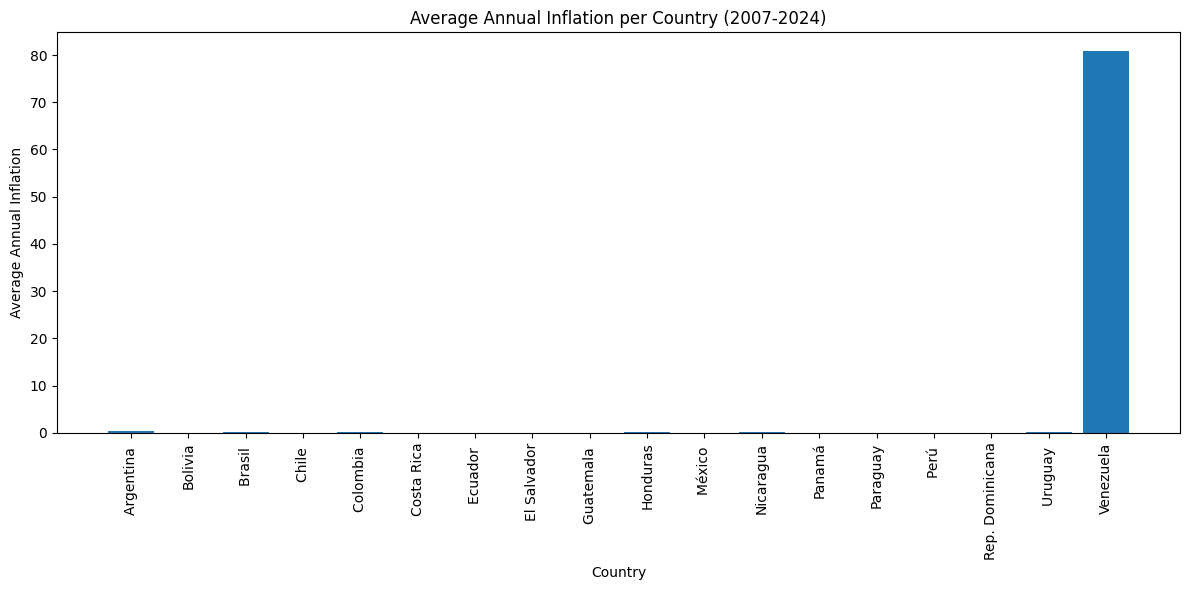

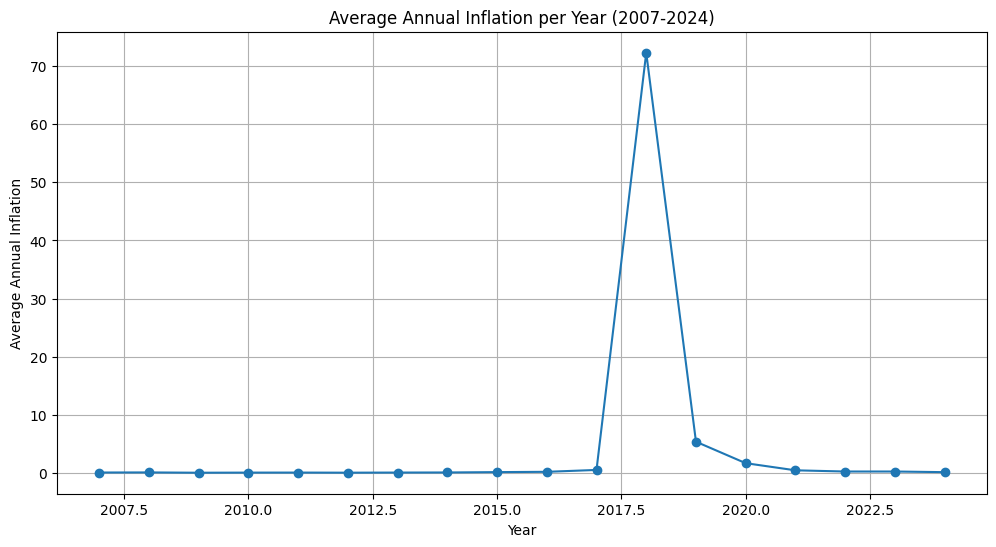

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(avg_inflation_per_country.index, avg_inflation_per_country.values)
plt.title("Average Annual Inflation per Country (2007-2024)")
plt.xlabel("Country")
plt.ylabel("Average Annual Inflation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(avg_inflation_per_year.index, avg_inflation_per_year.values, marker='o')
plt.title("Average Annual Inflation per Year (2007-2024)")
plt.xlabel("Year")
plt.ylabel("Average Annual Inflation")
plt.grid(True)
plt.show()

In [5]:
import json

# analysis_results = {
#     "average_inflation_per_country": avg_inflation_per_country.to_dict(),
#     "average_inflation_per_year": avg_inflation_per_year.to_dict(),
#     "highest_overall_inflation": country_highest_inflation.to_dict(),
#     "lowest_overall_inflation": country_lowest_inflation.to_dict()
# }

# Convert the entire DataFrame to a dictionary
all_data = df.to_dict(orient='records')

with open('inflation_data.json', 'w') as f:
    json.dump(all_data, f, indent=4)

print("All data exported to inflation_data.json")

All data exported to inflation_data.json
